# Detecting COVID-19 with Chest X Ray using PyTorch

Image classification of Chest X Rays in one of three classes: Normal, Viral Pneumonia, COVID-19

Dataset from [COVID-19 Radiography Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) on Kaggle



# Importing Libraries

In [1]:
%matplotlib inline

import os
import torch
import random
import torchvision
import numpy as np
import pandas as pd

from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import clear_output

torch.manual_seed(0)

print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.7.0+cu101


# Load Datasets
## COVID-19

In [2]:
covid_df = pd.read_csv('../datasets/normal-viral-covid19/COVID-19.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/covid'
images = [x for x in os.listdir(images_dir)[:300] if x[-3:].lower().endswith('png')]
images_map = {image.replace(' ', '').split('.')[0]: image for image in images}

covid_df['PATH'] = covid_df.apply(lambda col: '%s/%s' % (images_dir, images_map[col['FILE NAME']]), axis=1)
covid_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,COVID-19(1),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
1,COVID-19(2),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
2,COVID-19(3),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
3,COVID-19(4),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
4,COVID-19(5),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,../datasets/normal-viral-covid19/covid/COVID-1...
...,...,...,...,...,...
268,COVID-19(269),PNG,NaN,serial1,../datasets/normal-viral-covid19/covid/COVID-1...
269,COVID-19(270),PNG,NaN,serial2,../datasets/normal-viral-covid19/covid/COVID-1...
270,COVID-19(271),PNG,NaN,serial3,../datasets/normal-viral-covid19/covid/COVID-1...
271,COVID-19(272),PNG,NaN,serial4,../datasets/normal-viral-covid19/covid/COVID-1...


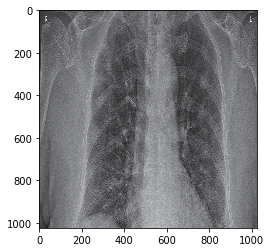

In [3]:
im_frame = Image.open(covid_df.at[0, 'PATH'])
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)

## COVID-19 Valencia

In [4]:
valencia_covid_df = pd.read_csv('../datasets/bimcv-covid19/bimcv-covid19.csv', index_col=0)

valencia_covid_df

,Subject,Session,Date,Age,Sex,Filename,Path,Is frontal
0,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-1_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
1,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-2_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
2,sub-S03909,ses-E08005,20200330,NaN,M,mod-rx/sub-S03909_ses-E08005_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03909/ses-E0800...,y
3,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,y
4,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,n
...,...,...,...,...,...,...,...,...
3032,sub-S03288,ses-E07142,20200310,NaN,F,mod-rx/sub-S03288_ses-E07142_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03288/ses-E0714...,y
3033,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,y
3034,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,n
3035,sub-S03492,ses-E07022,20200311,NaN,F,mod-rx/sub-S03492_ses-E07022_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03492/ses-E0702...,y


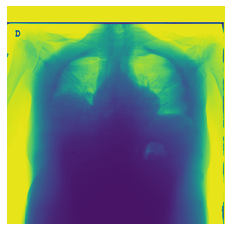

In [5]:
im_frame = Image.open(valencia_covid_df.at[0, 'Path']).resize((224, 224))
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)
plt.axis('off')
plt.savefig('a.jpg', bbox_inches='tight')

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(Image.open(valencia_covid_df.at[0, 'Path']))
# save the image
plt.imsave('a.jpg', data)

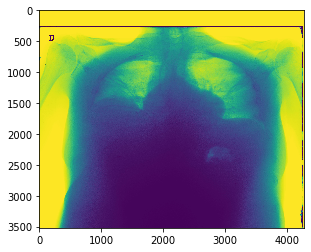

In [7]:
im_frame = Image.open('a.jpg').convert('RGB')
                                    
np_frame = np.array(im_frame)
ax = plt.imshow(np_frame)

## Normal

In [8]:
normal_df = pd.read_csv('../datasets/normal-viral-covid19/NORMAL.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/normal/'

normal_df['PATH'] = normal_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
normal_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,NORMAL-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1,NORMAL-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
2,NORMAL-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
3,NORMAL-4,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
4,NORMAL-5,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
...,...,...,...,...,...
1336,NORMAL-1337,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1337,NORMAL-1338,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1338,NORMAL-1339,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...
1339,NORMAL-1340,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/normal//NORMA...


## Viral

In [9]:
viral_df = pd.read_csv('../datasets/normal-viral-covid19/' + 'Viral Pneumonia.matadata.csv')
images_dir = '../datasets/normal-viral-covid19/viral/'

viral_df['PATH'] = viral_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
viral_df

,FILE NAME,FORMAT,SIZE,URL,PATH
0,Viral Pneumonia-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1,Viral Pneumonia-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
2,Viral Pneumonia-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
3,Viral Pneumonia-4,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
4,Viral Pneumonia-5,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
...,...,...,...,...,...
1340,Viral Pneumonia-1341,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1341,Viral Pneumonia-1342,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1342,Viral Pneumonia-1343,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...
1343,Viral Pneumonia-1344,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,../datasets/normal-viral-covid19/viral//Viral ...


# Creating Custom Dataset

In [10]:
class ChestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, images, transform):
        
        self.images = images
        self.class_names = ['normal', 'viral', 'covid']
        self.transform = transform
    
    def __len__(self):
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    def __getitem__(self, index):
        all_images = self.images[self.class_names[0]] \
          + self.images[self.class_names[1]] \
          + self.images[self.class_names[2]]
        all_class_names = [self.class_names[0]]*len(self.images[self.class_names[0]]) \
          + [self.class_names[1]]*len(self.images[self.class_names[1]]) \
          + [self.class_names[2]]*len(self.images[self.class_names[2]])
        image_path = all_images[index]
        class_name = all_class_names[index]
        image = Image.open(image_path)
        if 'bimcv' in image_path:
            data = np.array(Image.open(image_path))
            # save the image
            plt.imsave(image_path.replace('png','jpg'), data)
            image = Image.open(image_path.replace('png','jpg'))
        return self.transform(image.convert('RGB')), self.class_names.index(class_name)

# Image Transformations

In [11]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare DataLoader

In [12]:
len_covid = len(covid_df)
len_viral = len(viral_df)
len_normal = len(normal_df)

In [13]:
train_dirs = {
    'normal': list(normal_df['PATH'].values[:int(len_normal*0.8)]),
    'viral': list(viral_df['PATH'].values[:int(len_viral*0.8)]),
    'covid': list(covid_df['PATH'].values[:int(len_covid*0.8)]) + list(valencia_covid_df['Path'].values[:int((len_normal-len_covid)*0.8)])
}

train_dataset = ChestXRayDataset(train_dirs, transform)

In [14]:
for item in train_dirs.values():
    print(len(item))

1072
1076
1072


In [15]:
dev_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.8):int(len_normal*0.9)]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.8):int(len_viral*0.9)]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.8):int(len_covid*0.9)]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

dev_dataset = ChestXRayDataset(dev_dirs, transform)

In [16]:
for item in dev_dirs.values():
    print(len(item))

134
134
134


In [17]:
test_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.9):]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.9):]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.9):]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

test_dataset = ChestXRayDataset(test_dirs, transform)

In [18]:
for item in test_dirs.values():
    print(len(item))

135
135
135


In [19]:
batch_size = 24

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_dev = torch.utils.data.DataLoader(dev_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of dev batches', len(dl_dev))
print('Number of test batches', len(dl_test))

Number of training batches 135
Number of dev batches 17
Number of test batches 17


# Data Visualization

In [20]:
class_names = train_dataset.class_names

def show_images(images, labels, preds):
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(4, 6, (i + 1), xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'red' if preds[i] != labels[i] else 'green'

        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

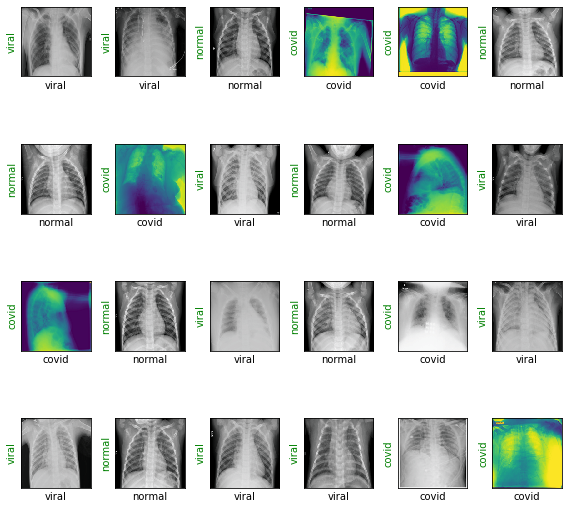

In [21]:
images, labels = next(iter(dl_train))
show_images(images, labels, labels)

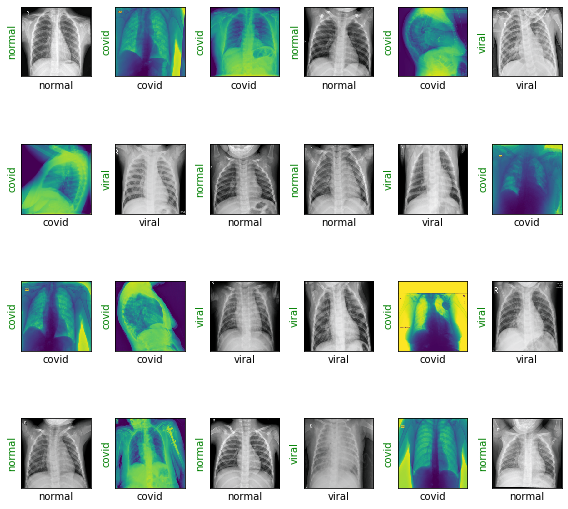

In [22]:
images, labels = next(iter(dl_dev))
show_images(images, labels, labels)

# Creating the Model

In [23]:
class ConvBlock(torch.nn.Module):
  def __init__(self, in_channels, out_channels, pool=True, stride=1):
    super(ConvBlock, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
    self.norm1 = torch.nn.BatchNorm2d(out_channels)
    self.relu1 = torch.nn.ReLU(inplace=True)
    self.conv2 = torch.nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1) 
    self.norm2 = torch.nn.BatchNorm2d(out_channels)
    self.relu2 = torch.nn.ReLU(inplace=True)
    self.conv3 = torch.nn.Conv2d(in_channels, out_channels, kernel_size=1)
    self.norm3 = torch.nn.BatchNorm2d(out_channels)
    self.relu3 = torch.nn.ReLU(inplace=True)
    self.pool = torch.nn.MaxPool2d(kernel_size=3, stride=2)
    self.pooling = pool
  def forward(self, input):
    y1 = self.relu1(self.norm1(self.conv1(input)))
    y1 = self.relu2(self.norm2(self.conv2(y1)))
    y2 = self.relu3(self.norm3(self.conv3(input)))
    if(self.pooling):
      return self.pool((y1+y2)/2)
    else:
      return (y1+y2)/2

class CoronaNet(torch.nn.Module):
  def __init__(self, in_channels=3):
    super(CoronaNet, self).__init__()
    self.b1 = ConvBlock(in_channels, 16, stride=2)
    self.b2 = ConvBlock(16, 32)
    self.b3 = ConvBlock(32, 48)
    self.b4 = ConvBlock(48, 64)
    self.b5 = ConvBlock(64, 80)
    self.b6 = ConvBlock(80, 100)

    self.dense = torch.nn.Linear(100, 3)
  def forward(self, input):
    res = self.b6(self.b5(self.b4(self.b3(self.b2(self.b1(input))))))
    out = torch.mean(res, dim=(2,3))
    logit = self.dense(out)
    return torch.nn.functional.softmax(logit)
  
model = CoronaNet()

In [24]:
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn = loss_fn.to('cuda')
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [25]:
def show_preds():
    model.to('cuda')
    model.eval()
    images, labels = next(iter(dl_dev))
    outputs = model(images.to('cuda')).cpu()
    _, preds = torch.max(outputs, 1)
    show_images(images, labels, preds.cpu())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


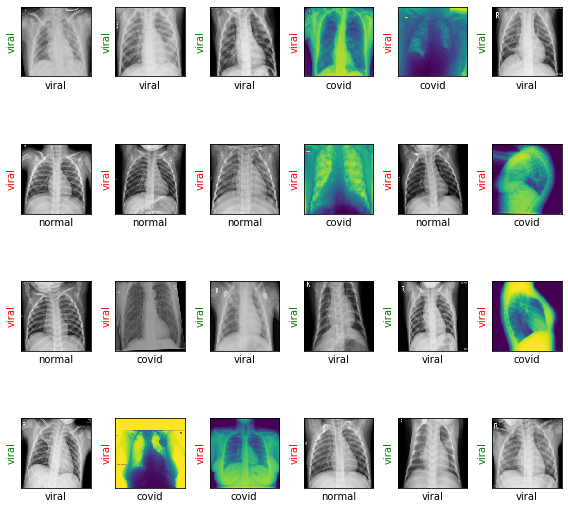

In [26]:
show_preds()

# Training the Model

In [27]:
train_losses = []
train_accuracies = []
dev_losses = []
dev_accuracies = []
def train(epochs):
    model.to('cuda')
    print('Starting training..')
    for e in range(0, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        train_accuracy = 0.
        train_loss = 0.
        # Model training
        model.train() # set model to training phase
        for train_step, (images, labels) in enumerate(dl_train):
            images = images.to('cuda')
            labels = labels.to('cuda')
            optimizer.zero_grad()
            outputs = model(images)
            outputs = outputs.to('cuda')
            loss = loss_fn(outputs, labels)
            loss = loss.to('cuda')
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            print(f'{train_step}/{len(dl_train)}: Train Loss: {train_loss:.4f}')
            _, preds = torch.max(outputs, 1)
            train_accuracy += sum((np.array(preds.cpu()) == np.array(labels.cpu())))
        
        train_loss /= (train_step + 1)
        train_losses.append(train_loss)
        train_accuracy = train_accuracy/len(train_dataset)
        train_accuracies.append(train_accuracy)
        print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy}')

        # Model validation
        dev_accuracy = 0
        dev_loss = 0.
        model.eval() # set model to eval phase
        for val_step, (images, labels) in enumerate(dl_dev):
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images)
            outputs = outputs.to('cuda')
            loss = loss_fn(outputs, labels)
            loss = loss.to('cuda')
            dev_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            dev_accuracy += sum((np.array(preds.cpu()) == np.array(labels.cpu())))

        dev_loss /= (val_step + 1)
        dev_losses.append(dev_loss)
        dev_accuracy = dev_accuracy/len(dev_dataset)
        dev_accuracies.append(dev_accuracy)
        print(f'Dev Loss: {dev_loss:.4f}, Accuracy: {dev_accuracy:.4f}')

        show_preds()
        model.train() # set model to training phase

        
    print('Training complete...')

In [ ]:
%%time
print(torch.cuda.is_available())

torch.cuda.set_device(0)
# On device 0
with torch.cuda.device(0):
    train(epochs=20)

True
Starting training..
Starting epoch 1/20


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0/135: Train Loss: 1.1077
1/135: Train Loss: 2.2208
2/135: Train Loss: 3.3077
3/135: Train Loss: 4.3944
4/135: Train Loss: 5.4917
5/135: Train Loss: 6.5638
6/135: Train Loss: 7.6259
7/135: Train Loss: 8.6788
8/135: Train Loss: 9.7788
9/135: Train Loss: 10.7964
10/135: Train Loss: 11.8678
11/135: Train Loss: 12.8779
12/135: Train Loss: 13.9079
13/135: Train Loss: 14.9155
14/135: Train Loss: 15.9175
15/135: Train Loss: 16.9079
16/135: Train Loss: 17.8750
17/135: Train Loss: 18.8842
18/135: Train Loss: 19.8879
19/135: Train Loss: 20.8168
20/135: Train Loss: 21.7273
21/135: Train Loss: 22.6508
22/135: Train Loss: 23.5898
23/135: Train Loss: 24.4956
24/135: Train Loss: 25.3996
25/135: Train Loss: 26.3364
26/135: Train Loss: 27.2825
27/135: Train Loss: 28.1436
28/135: Train Loss: 29.0429
29/135: Train Loss: 29.9608
30/135: Train Loss: 30.8446
31/135: Train Loss: 31.7110
32/135: Train Loss: 32.5308
33/135: Train Loss: 33.3134
34/135: Train Loss: 34.1126
35/135: Train Loss: 34.9847
36/135: Tra

# Final Results

## Show the training/dev curve

Text(0.5, 0, '# epochs')

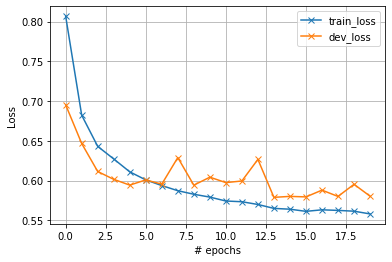

In [44]:
train_dev_loss_df = pd.DataFrame({'train_loss': train_losses, 'dev_loss': dev_losses})
ax = train_dev_loss_df.plot(marker='x', grid=True)
ax.set_ylabel('Loss')
ax.set_xlabel('# epochs')

Save to csv

In [30]:
train_dev_loss_df.to_csv('train_dev_loss_reference_balanced_custom.csv')

## Mismatched examples analysis

- train

In [32]:
model.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_train):
    print(i)
    output = model(images.to('cuda')).cpu()
    _, preds = torch.max(output, 1)
    labels_all += labels
    preds_all += preds

train_comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
train_comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
train_comparison_df['misclassified'] = train_comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
train_comparison_df.head()

0


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134


,labels,preds,misclassified
0,2,2,False
1,0,0,False
2,0,0,False
3,1,1,False
4,1,1,False


In [35]:
train_comparison_df[train_comparison_df['misclassified'] == True]

,labels,preds,misclassified
97,0,1,True
266,0,1,True
673,1,0,True
868,2,0,True
1338,0,1,True
1614,1,0,True
1669,0,1,True
2464,0,1,True
3052,0,1,True
3193,0,1,True


In [36]:
train_accuracy = sum(np.array(labels_all) == np.array(preds_all)) / len(preds_all)
print('Train accuracy is %.4f' % train_accuracy)

Train accuracy is 0.9969


- test

In [37]:
model.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_test):
    output = model(images.to('cuda')).cpu()
    _, preds = torch.max(output, 1)
    labels_all += labels
    preds_all += preds

comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
comparison_df['misclassified'] = comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
comparison_df.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


,labels,preds,misclassified
0,2,2,False
1,1,1,False
2,0,1,True
3,0,0,False
4,1,1,False


Display mismatched examples

In [38]:
comparison_df[comparison_df['misclassified'] == True]

,labels,preds,misclassified
2,0,1,True
13,0,1,True
19,0,1,True
26,0,1,True
36,1,0,True
42,2,1,True
61,1,0,True
65,0,1,True
85,0,1,True
88,1,0,True


Save to file

In [39]:
comparison_df.to_csv('misclassified_reference_balanced_custom.csv')

## Test Accuracy

In [40]:
test_accuracy = sum(np.array(labels_all) == np.array(preds_all)) / len(preds_all)
print('Test accuracy is %.4f' % test_accuracy)

Test accuracy is 0.9358


In [41]:
training_dev_accuracy_df = pd.DataFrame({'training_accuracy': train_accuracies, 'dev_accuracy': dev_accuracies})
training_dev_accuracy_df.tail()

,training_accuracy,dev_accuracy
15,0.995342,0.975124
16,0.994720,0.962687
17,0.994410,0.972637
18,0.994410,0.955224
19,0.996584,0.970149


# Confusion Matrix

In [42]:
model.eval() # set model to eval phase

nb_classes = 3

with torch.no_grad():
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    for i, (images, labels) in enumerate(dl_test):
        outputs = model(images.to('cuda')).cpu()
        _, preds = torch.max(outputs, 1)
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

confusion_matrix_df = pd.DataFrame(confusion_matrix.numpy(), columns=class_names, index=class_names)
confusion_matrix_df

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


,normal,viral,covid
normal,119.0,16.0,0.0
viral,6.0,128.0,1.0
covid,0.0,3.0,132.0


Save to csv

In [43]:
confusion_matrix_df.to_csv('confusion_matrix_reference_balanced_custom.csv')

## Save model

In [33]:
torch.save(model.state_dict(), 'reference_balanced_custom.pth')

## Load model

In [103]:
model = CoronaNet()
model.load_state_dict(torch.load('reference_balanced_custom.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Calculate Embedding for each COVID Image

In [ ]:
# https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c
import torchvision.transforms as transforms
from torch.autograd import Variable

model.eval()
model.to('cpu')

scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_embedding(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    embedding = {}
    # 4. Define a function that will copy the output of a layer
    def copy_data_to_dict(m, i, o):
        embedding['out'] = o.data
    # 5. Attach that function to our selected layer
    h = model._modules.get('avgpool').register_forward_hook(copy_data_to_dict)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return embedding['out']

x = get_embedding(covid_df.at[0, 'PATH'])
x.numpy().squeeze().shape

## Find Cosine-similar images

In [ ]:
# Using PyTorch Cosine Similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
              pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))

## Display Top 5 Images